In [1]:
from keras.models import Sequential

In [2]:
import tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("weatherAUS.csv")

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Check the data is balanced or imbalanced

In [8]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

##### This is imbalanced data set

In [9]:
df['Date'].dtype

dtype('O')

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [12]:
df_col=df.columns[df.dtypes=='float64']
cc=df[df_col].corr()
cc

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [13]:
# pip install seaborn --upgrade
# for heatmap i upgrade this issue now its working fine

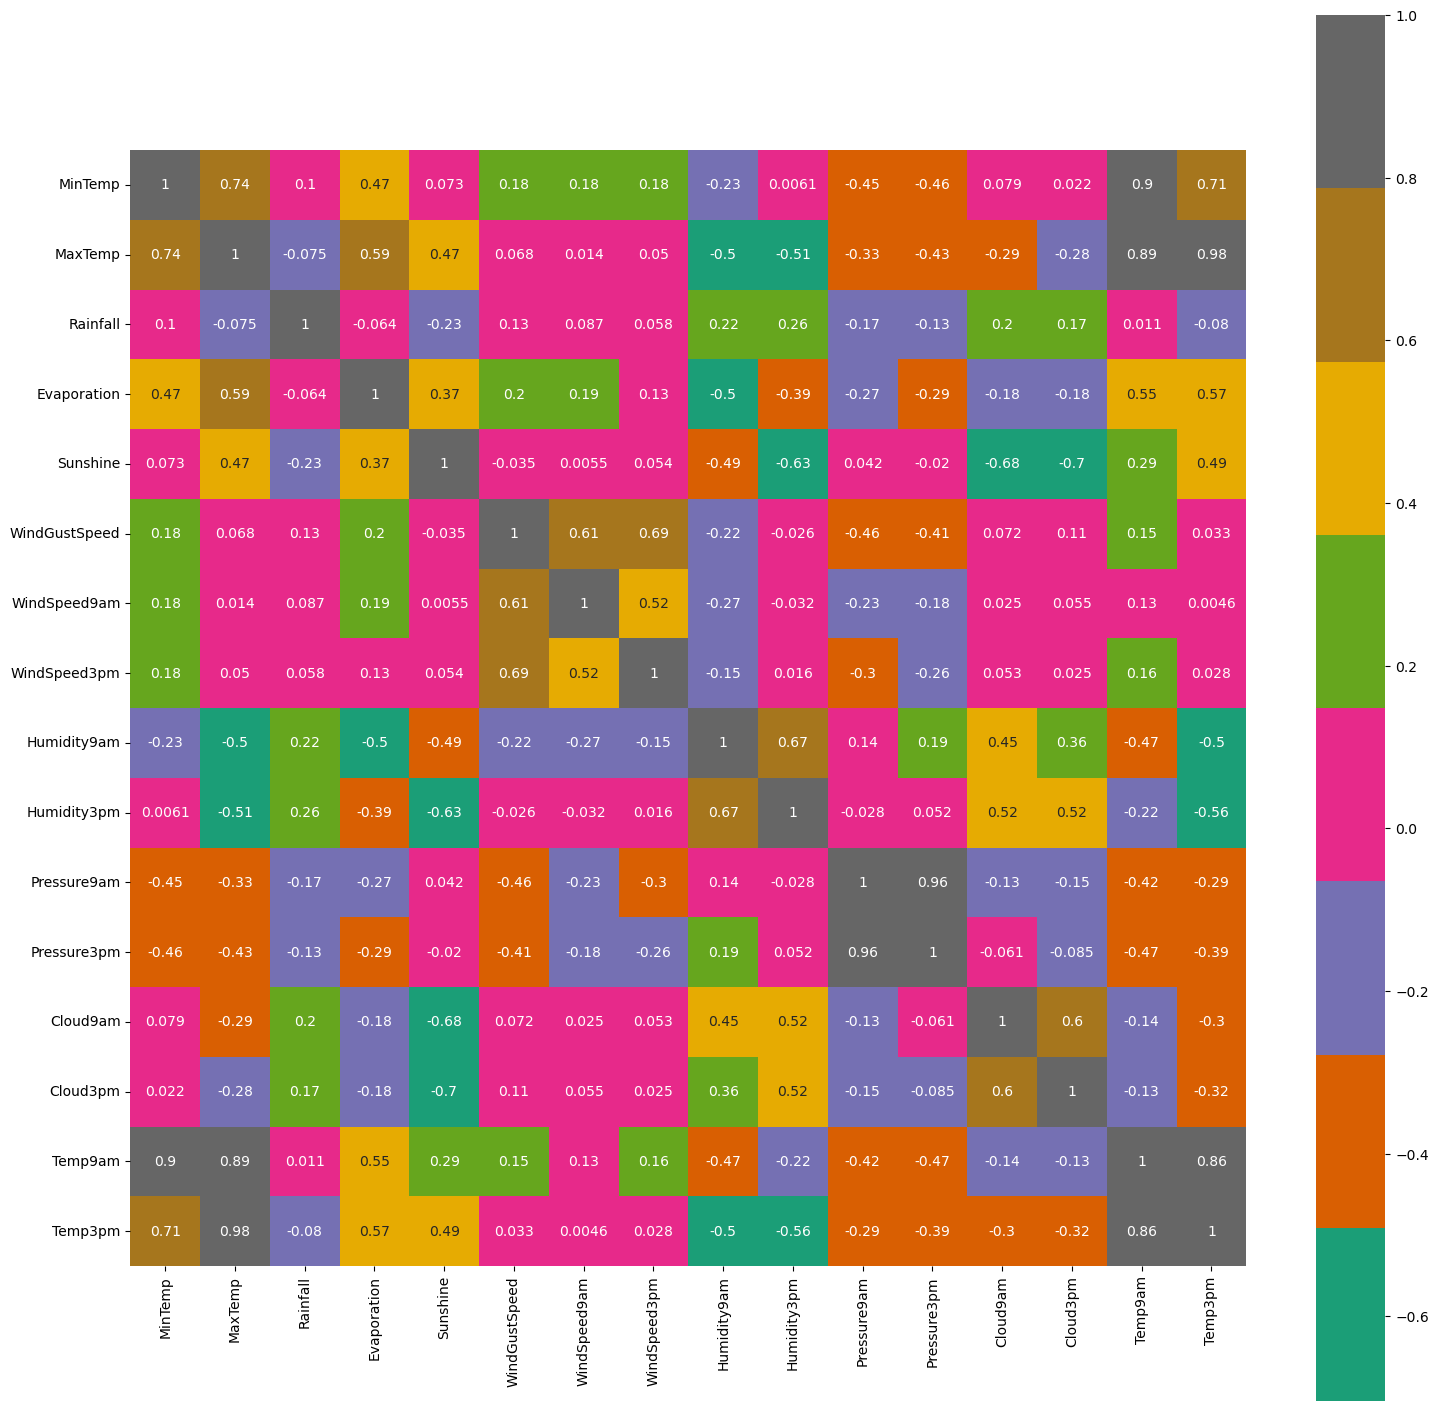

In [14]:
plt.subplots(figsize=(18,18))
sns.heatmap(cc,cmap= 'Dark2',annot=True, square=True,)
plt.show()

In [15]:
# Size of the dataset
df.shape

(145460, 23)

In [16]:
# Check the null values

In [17]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [19]:
cat_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
cat_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [20]:
num_cols=[]
for i in df.columns:
    if df[i].dtypes=='float64':
        num_cols.append(i)
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
# df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode()[0],inplace=True)

In [22]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [23]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [24]:
for i in num_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [25]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [26]:
def correlation(dataset, threshold = 0.85):
  c = dataset.corr().abs()
  s = c.unstack()
  so = s.sort_values(kind="quicksort")
  results = []
  for index, row in so.items():
    if index[0] != index[1] and row > threshold:
      results.append({index: row})
  return results

In [27]:
correlation(cc)

[{('Humidity9am', 'Sunshine'): 0.8542969193896146},
 {('Sunshine', 'Humidity9am'): 0.8542969193896146},
 {('Humidity9am', 'MaxTemp'): 0.8607165259396418},
 {('MaxTemp', 'Humidity9am'): 0.8607165259396418},
 {('Humidity9am', 'Temp3pm'): 0.8655811927489235},
 {('Temp3pm', 'Humidity9am'): 0.8655811927489235},
 {('Temp3pm', 'MinTemp'): 0.8687817289330814},
 {('MinTemp', 'Temp3pm'): 0.8687817289330814},
 {('Cloud3pm', 'Humidity3pm'): 0.8689240961849981},
 {('Humidity3pm', 'Cloud3pm'): 0.8689240961849981},
 {('Cloud9am', 'Humidity3pm'): 0.8821393815065216},
 {('Humidity3pm', 'Cloud9am'): 0.8821393815065216},
 {('WindGustSpeed', 'WindSpeed9am'): 0.884238536809569},
 {('WindSpeed9am', 'WindGustSpeed'): 0.884238536809569},
 {('Temp9am', 'Evaporation'): 0.888145047421236},
 {('Evaporation', 'Temp9am'): 0.888145047421236},
 {('MaxTemp', 'MinTemp'): 0.8884729060202518},
 {('MinTemp', 'MaxTemp'): 0.8884729060202518},
 {('Evaporation', 'Humidity9am'): 0.9040278666048059},
 {('Humidity9am', 'Evaporat

In [28]:
correlation_with_target = cc['Humidity9am'].abs().sort_values(ascending=False)

# Select the top correlated features (adjust the threshold as needed)
threshold = 0.36  # Adjust this threshold as needed
highly_correlated_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

print("Highly correlated features with target:")
print(highly_correlated_features)

Highly correlated features with target:
['Humidity9am', 'Humidity3pm', 'MaxTemp', 'Evaporation', 'Temp3pm', 'Sunshine', 'Temp9am', 'Cloud9am']


In [29]:
# remove Outliers

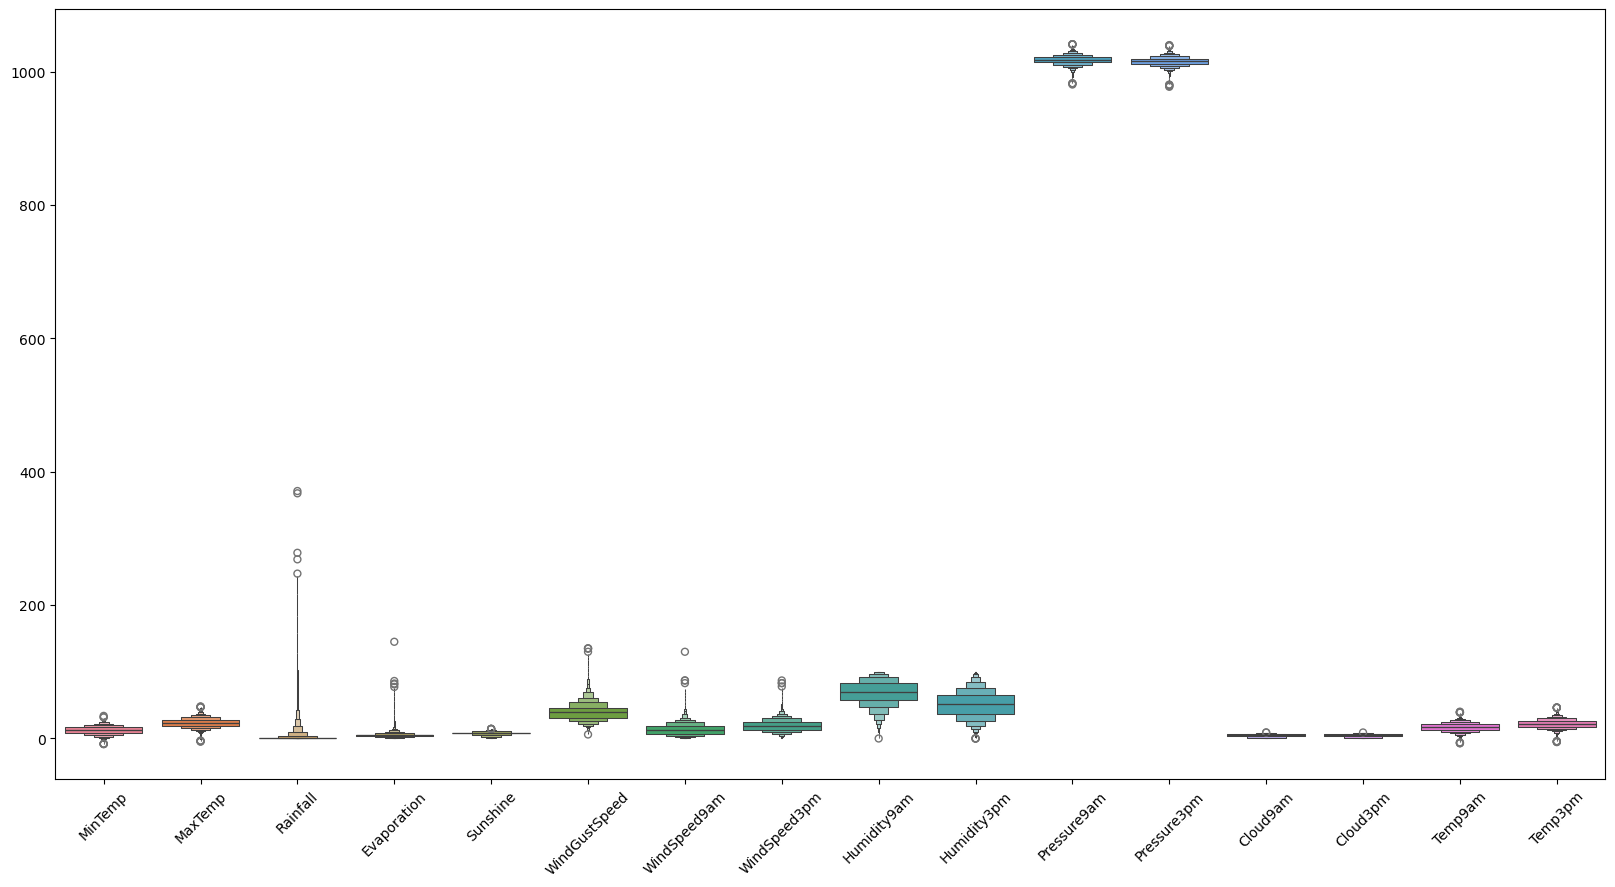

In [30]:
plt.subplots(figsize=(20,10))
sns.boxenplot(df[num_cols])
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Rainfall'>

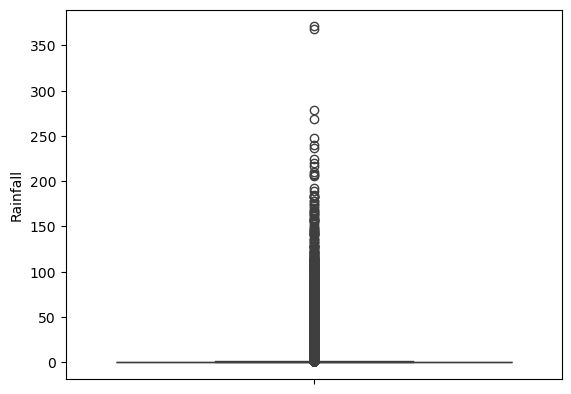

In [31]:
sns.boxplot(df['Rainfall'])

In [32]:
df['Rainfall'].describe()

count    145460.000000
mean          2.307990
std           8.389771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: Rainfall, dtype: float64

In [33]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [34]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No


# Feature engennering

In [35]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [36]:
le=LabelEncoder()
scaler=StandardScaler()

In [37]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [38]:
for i in num_cols:
    df[i]=scaler.fit_transform(df[[i]])

In [39]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,0.189757,-0.044575,-0.203581,-0.119472,0.14871,13,0.307739,13,...,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,0,0
1,2008-12-02,2,-0.752786,0.265794,-0.275097,-0.119472,0.14871,14,0.307739,6,...,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,0,0


# Split the dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=df.drop(columns=['Date','RainTomorrow'])

In [42]:
X.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,0.189757,-0.044575,-0.203581,-0.119472,0.14871,13,0.307739,13,14,...,0.611499,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,0
1,2,-0.752786,0.265794,-0.275097,-0.119472,0.14871,14,0.307739,6,15,...,0.382054,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,0


In [43]:
y=df['RainTomorrow']

In [44]:
y.head(2)

0    0
1    0
Name: RainTomorrow, dtype: int32

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Model Training

##### Early stopping

In [46]:
from keras.layers import Dropout,Dense,ReLU,BatchNormalization,Dropout

In [47]:
from keras import callbacks

In [48]:
early_stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

In [49]:
model=Sequential()

In [50]:
X.shape

(145460, 21)

In [51]:
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=21))
# input is 21 neurons and 1st hdden layer is 32 neurons i.e unit

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
# 2nd hidden layer with 32 neurons
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
# 3rd hidden layer with 16 neurons
model.add(Dropout(rate=0.20))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
# 4th hidden layer with 8 neurons
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
# 5th and o/p layer

In [53]:
from keras.utils import plot_model

In [54]:
# pip install pydot

In [55]:
# pip install pydot graphviz

In [56]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [57]:
# !conda install pydot graphviz

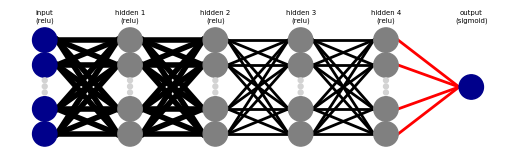

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [74]:
from nnv import NNV

layersList = [
    {"title":"input\n(relu)", "units": 21, "color": "darkBlue","edges_color":"black"},
    {"title":"hidden 1\n(relu)", "units": 32,"edges_color":"black"},
    {"title":"hidden 2\n(relu)", "units": 32, "edges_color":"black", "edges_width":2},
    {"title":"hidden 3\n(relu)", "units": 16, "edges_color":"black", "edges_width":2},
    {"title":"hidden 4\n(relu)", "units": 8, "edges_color":'red', "edges_width":2},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList,spacing_layer=100,font_size=5).render(save_to_file="my_example.png")

In [59]:
# pip install nnv

# Train the model

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,callbacks=early_stopping,validation_split=0.2)

Epoch 1/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8144 - loss: 0.4273 - val_accuracy: 0.8443 - val_loss: 0.3621
Epoch 2/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8437 - loss: 0.3644 - val_accuracy: 0.8461 - val_loss: 0.3556
Epoch 3/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8435 - loss: 0.3635 - val_accuracy: 0.8456 - val_loss: 0.3612
Epoch 4/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8461 - loss: 0.3582 - val_accuracy: 0.8477 - val_loss: 0.3552
Epoch 5/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8466 - loss: 0.3567 - val_accuracy: 0.8482 - val_loss: 0.3530
Epoch 6/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8464 - loss: 0.3555 - val_accuracy: 0.8488 - val_loss: 0.3579
Epoch 7/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8476 - loss: 0.3529 - val_accuracy: 0.8493 - val_loss: 0.3511
Epoch 8/100
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8482 -

In [78]:
# aa

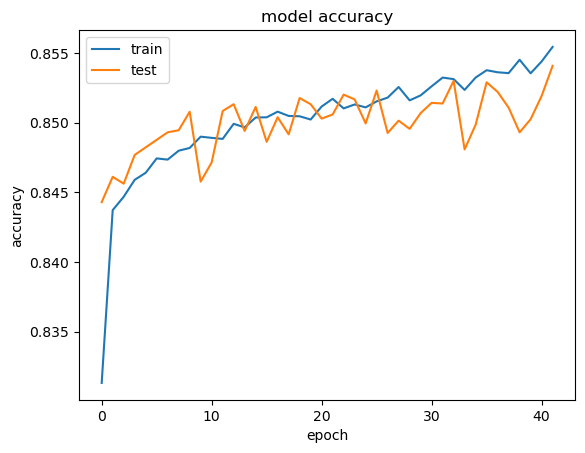

In [80]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
# Predict
y_pred=model.predict(X_test)

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [82]:
y_pred=(y_pred>0.5)

In [83]:
accuracy_score(y_pred,y_test)

0.8525596956780788

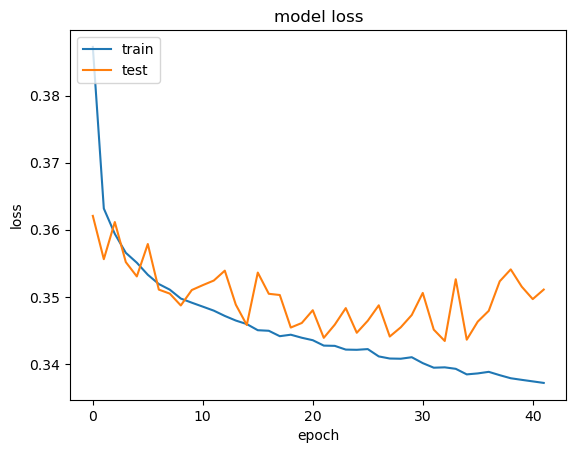

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()